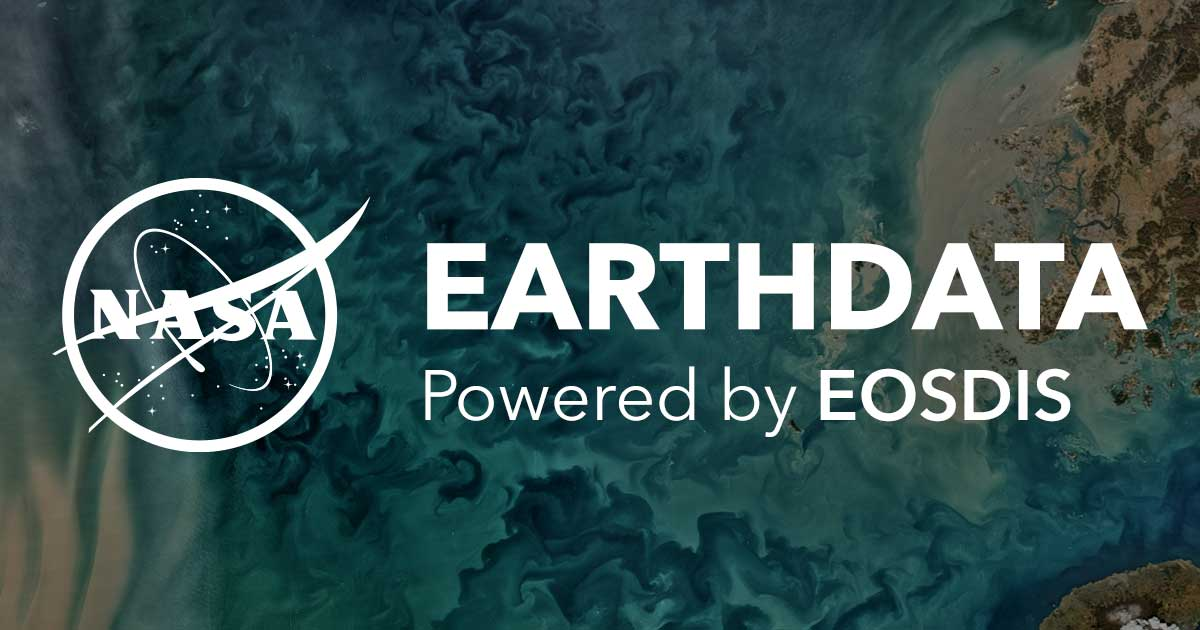

# <div style="text-align: center;">
  <h1><span style="color:blue; font-family:'Bodoni MT Black';">Web Scraping </span><span style="color:red; font-family:'Bodoni MT Black';">API </span><span style="color:blue; font-family:'Bodoni MT Black';">NASA-EONET</span></h1>
</div>


<p>Mediante el uso de aplicaciones cliente, como Worldview de NASA EOSDIS, los usuarios pueden navegar por todo el mundo diariamente y buscar eventos naturales a medida que ocurren. Las tormentas se ven regularmente en los trópicos, tormentas de polvo sobre los desiertos, incendios forestales en los veranos. Estos eventos ocurren constantemente y las imágenes NRT de la NASA pueden representarlos todos utilizando una variedad de parámetros de datos diferentes. Sin embargo, la experiencia del usuario está personalizada y, por lo tanto, restringida por la aplicación del cliente. </p> 

<p>¿Qué pasaría si hubiera una API que proporcionara una lista seleccionada de eventos naturales y proporcionara una forma de vincular esos eventos a capas de imágenes NRT relacionadas con eventos?  Entra EONET.</p>

<p>El Rastreador de Eventos Naturales del Observatorio de la Tierra (<span style="color:red">EONET</span>) es un servicio web prototipo con el objetivo de:</p>

<ul>
  <li>Proporcionar una fuente seleccionada de metadatos de eventos naturales continuamente actualizados.</li>
  <li>Proporcionar un servicio que vincule esos eventos naturales con fuentes de imágenes habilitadas para servicios web relacionadas temáticamente(por ejemplo, a través de WMS, WMTS, etc.).</ul>
     <p> Consulte la documentación de su API para obtener más información sobre cómo utilizar los servicios web de EONET.</p>

<p>El desarrollo de EONET comenzó en 2015 y ha sido apoyado por el Proyecto del Sistema de Información y Datos de Ciencias de la Tierra y el Observatorio de la Tierra (ESDIS) de la NASA.</p>




## Acceder a la documentación del API de EONET

En la interfaz de usuario de EONET, busca el enlace o botón llamado "Documentación" o "API". Este enlace nos llevará a la página que contiene información detallada sobre cómo utilizar el API de EONET.


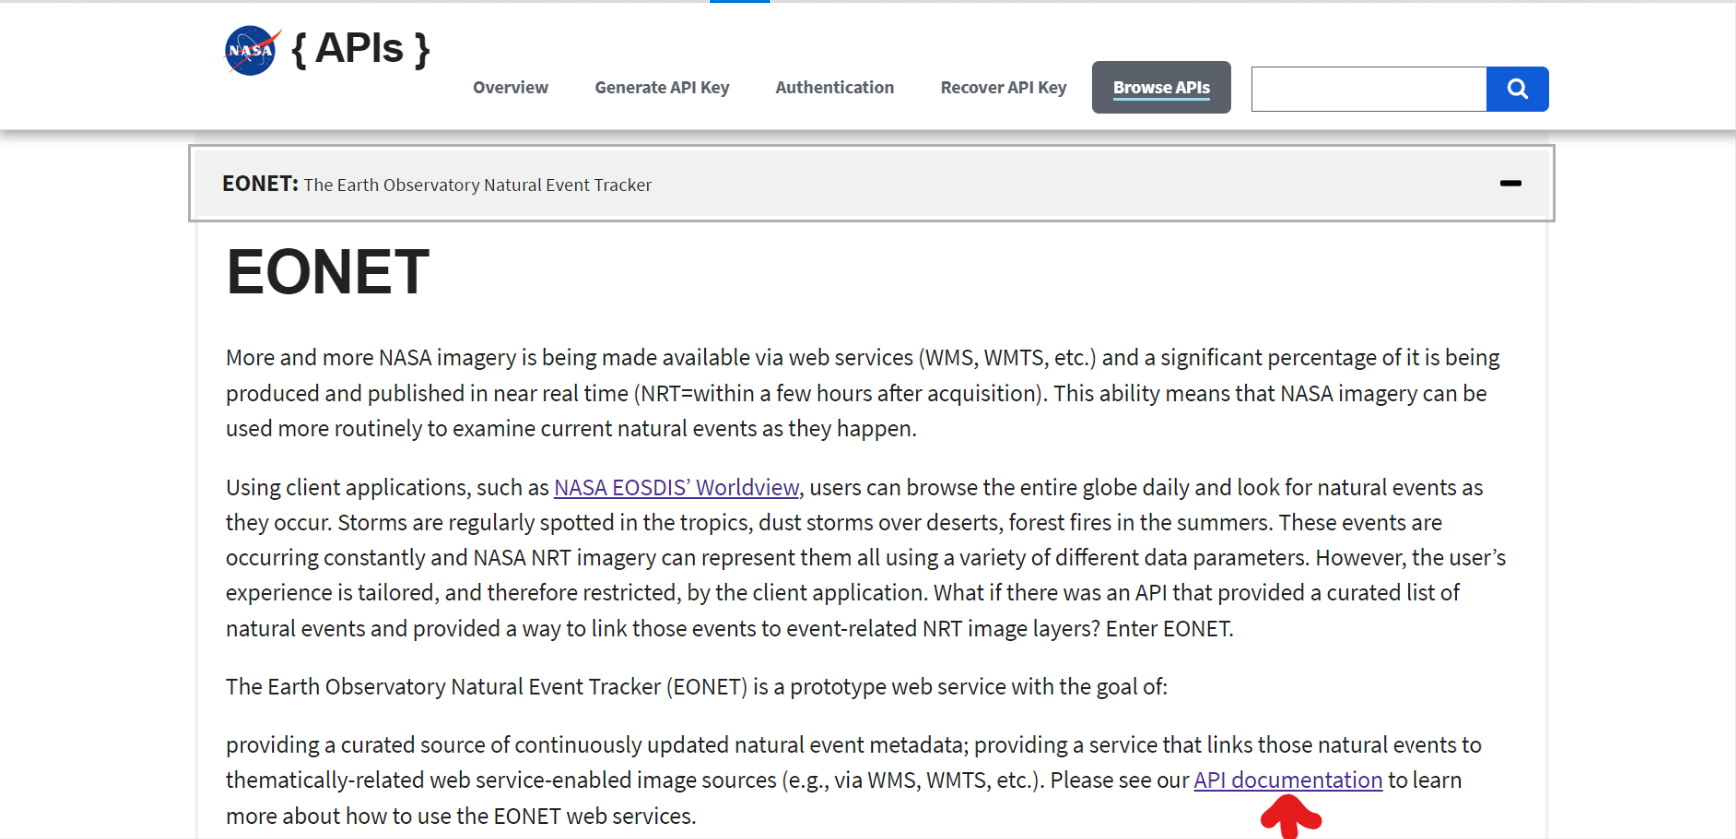

Una vez que hayas localizado el enlace "Documentación", haz clic en él. Se abrirá una nueva página que contiene toda la información que necesitamos para utilizar el API de EONET.

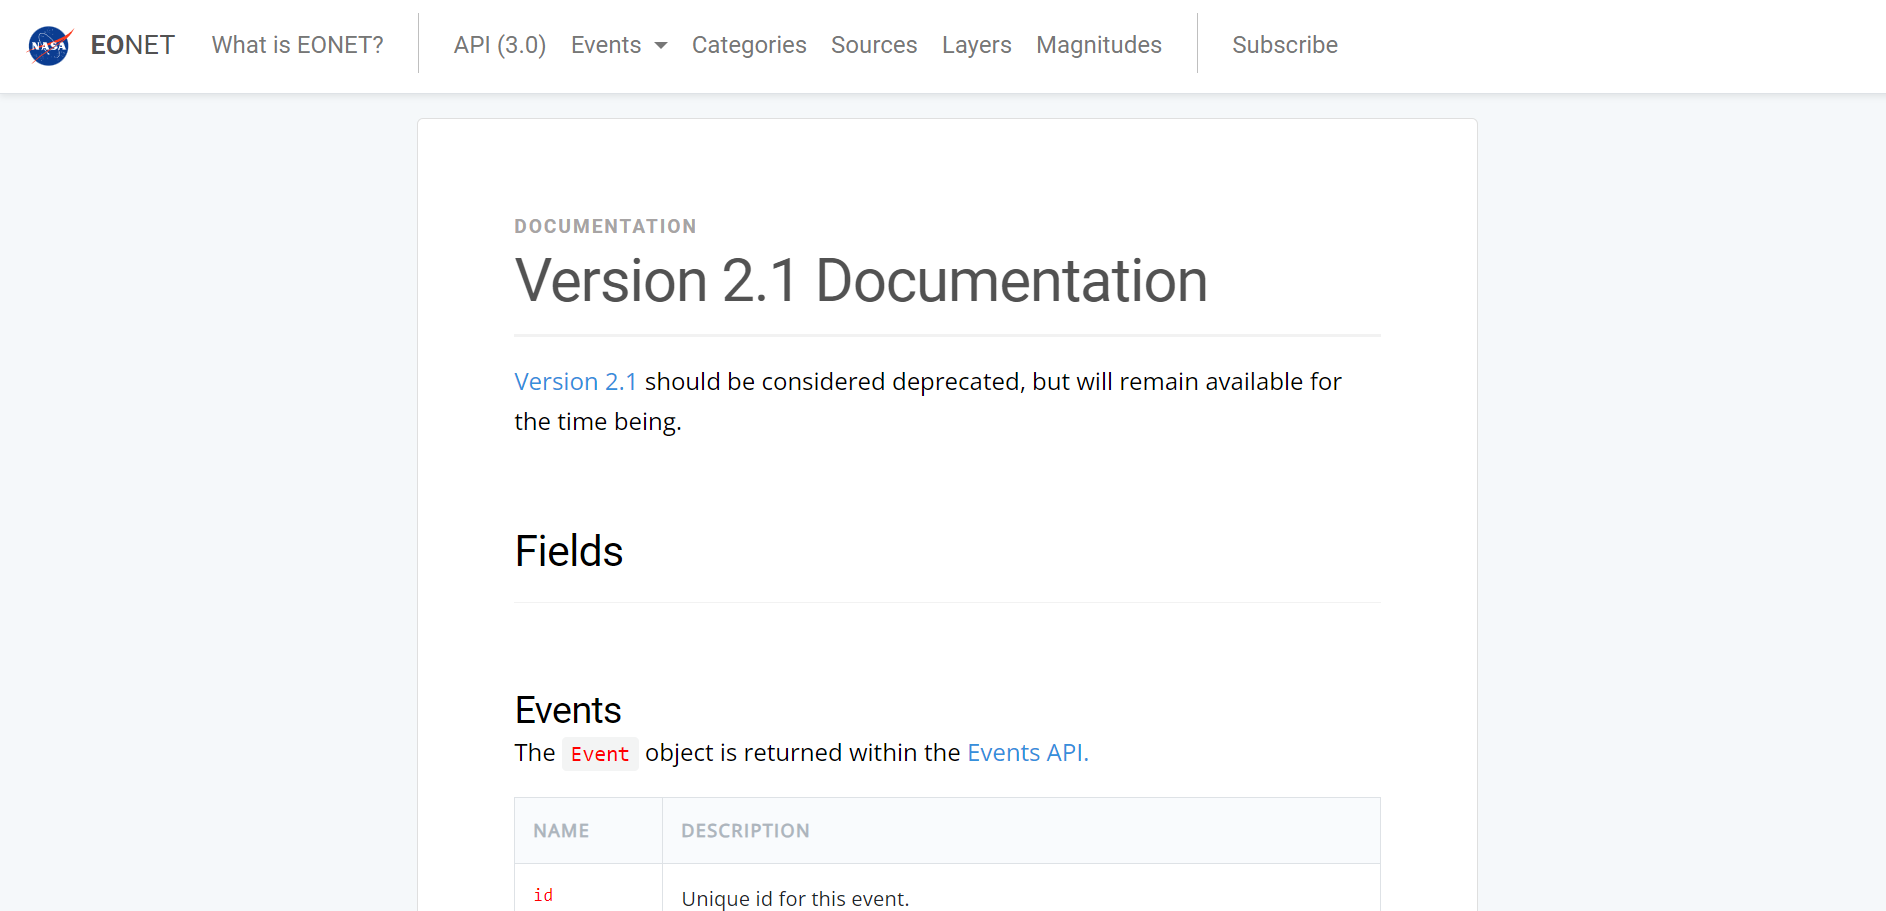

EONET ofrece una variedad de formatos de datos para facilitar el acceso y el análisis de la información sobre eventos naturales en tiempo real. Estos formatos incluyen: JSON, Atom, GeoJSON y RSS.

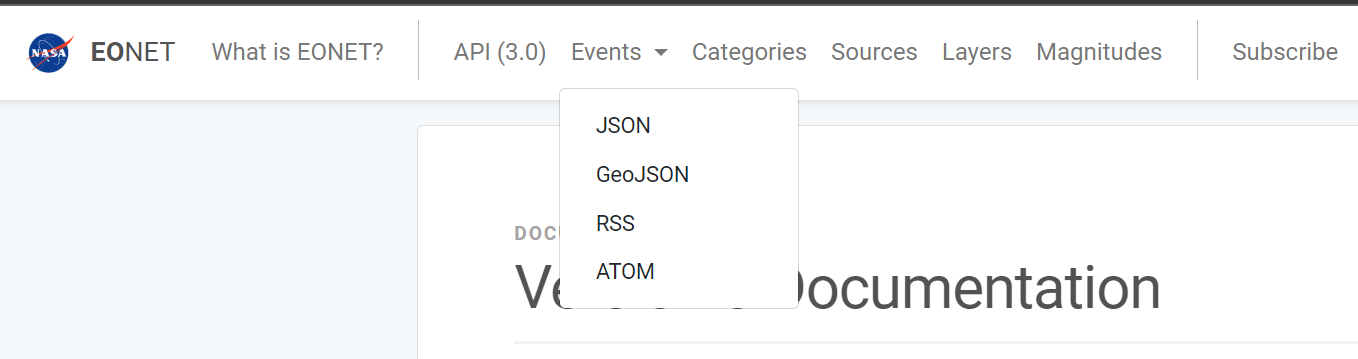


Dentro de la sección de "API de Eventos", busca el enlace que se refiere al "Eventos API" y haz clic en él. Este enlace te llevará a la documentación específica del API de Eventos.

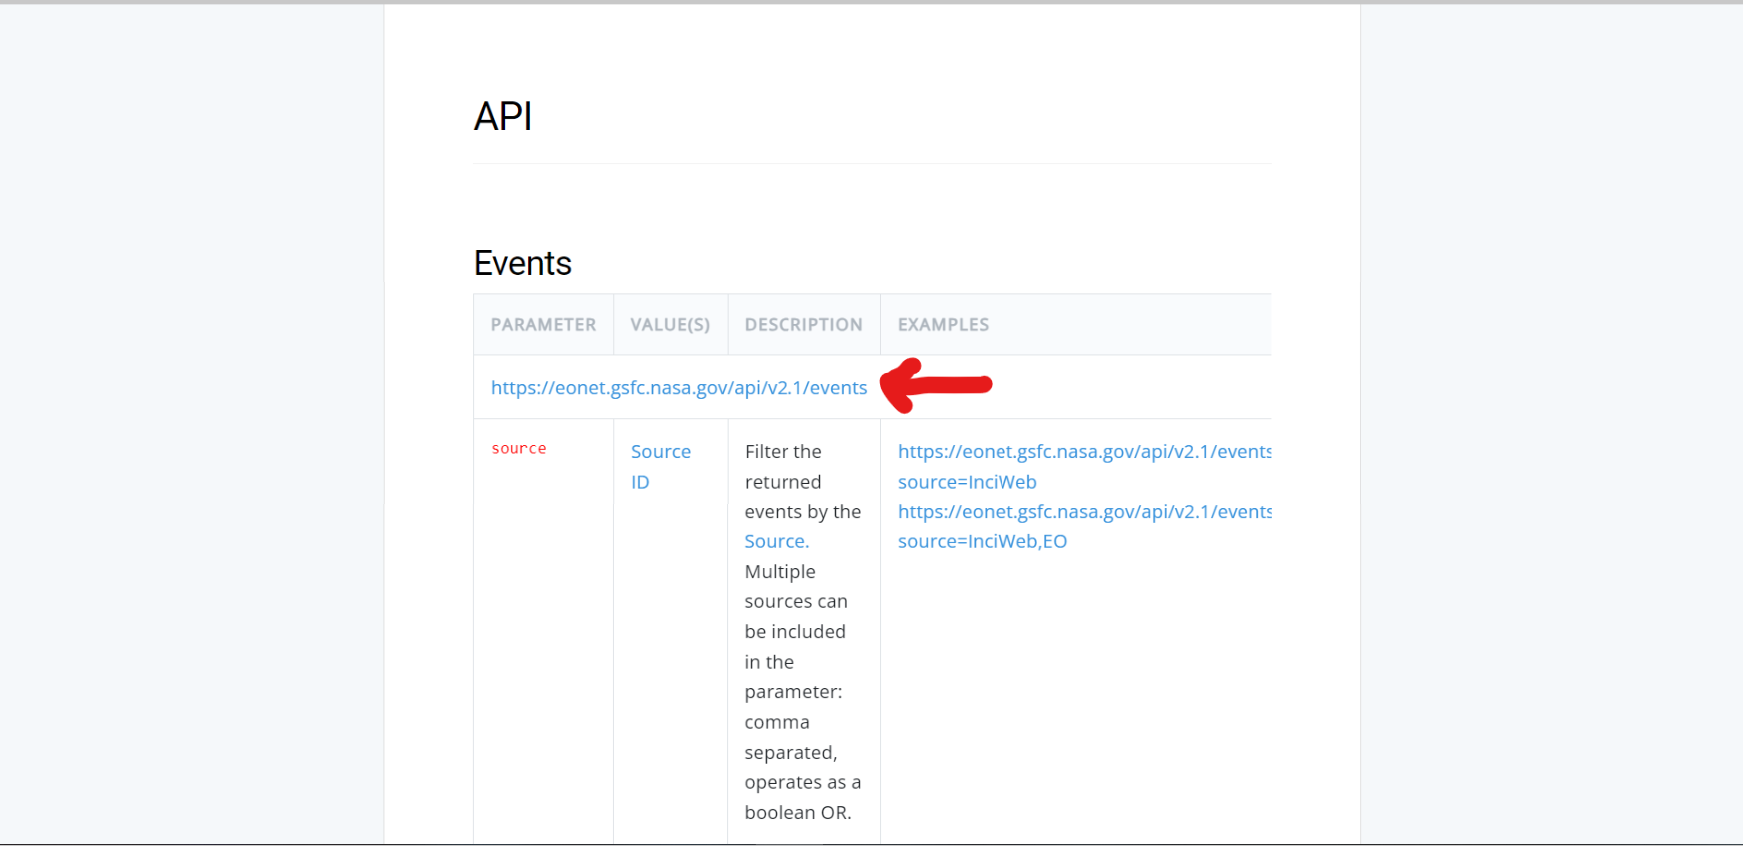


En la sección "events", hay una lista de eventos específicos dentro del objeto JSON. Cada evento tiene su propio conjunto de propiedades.

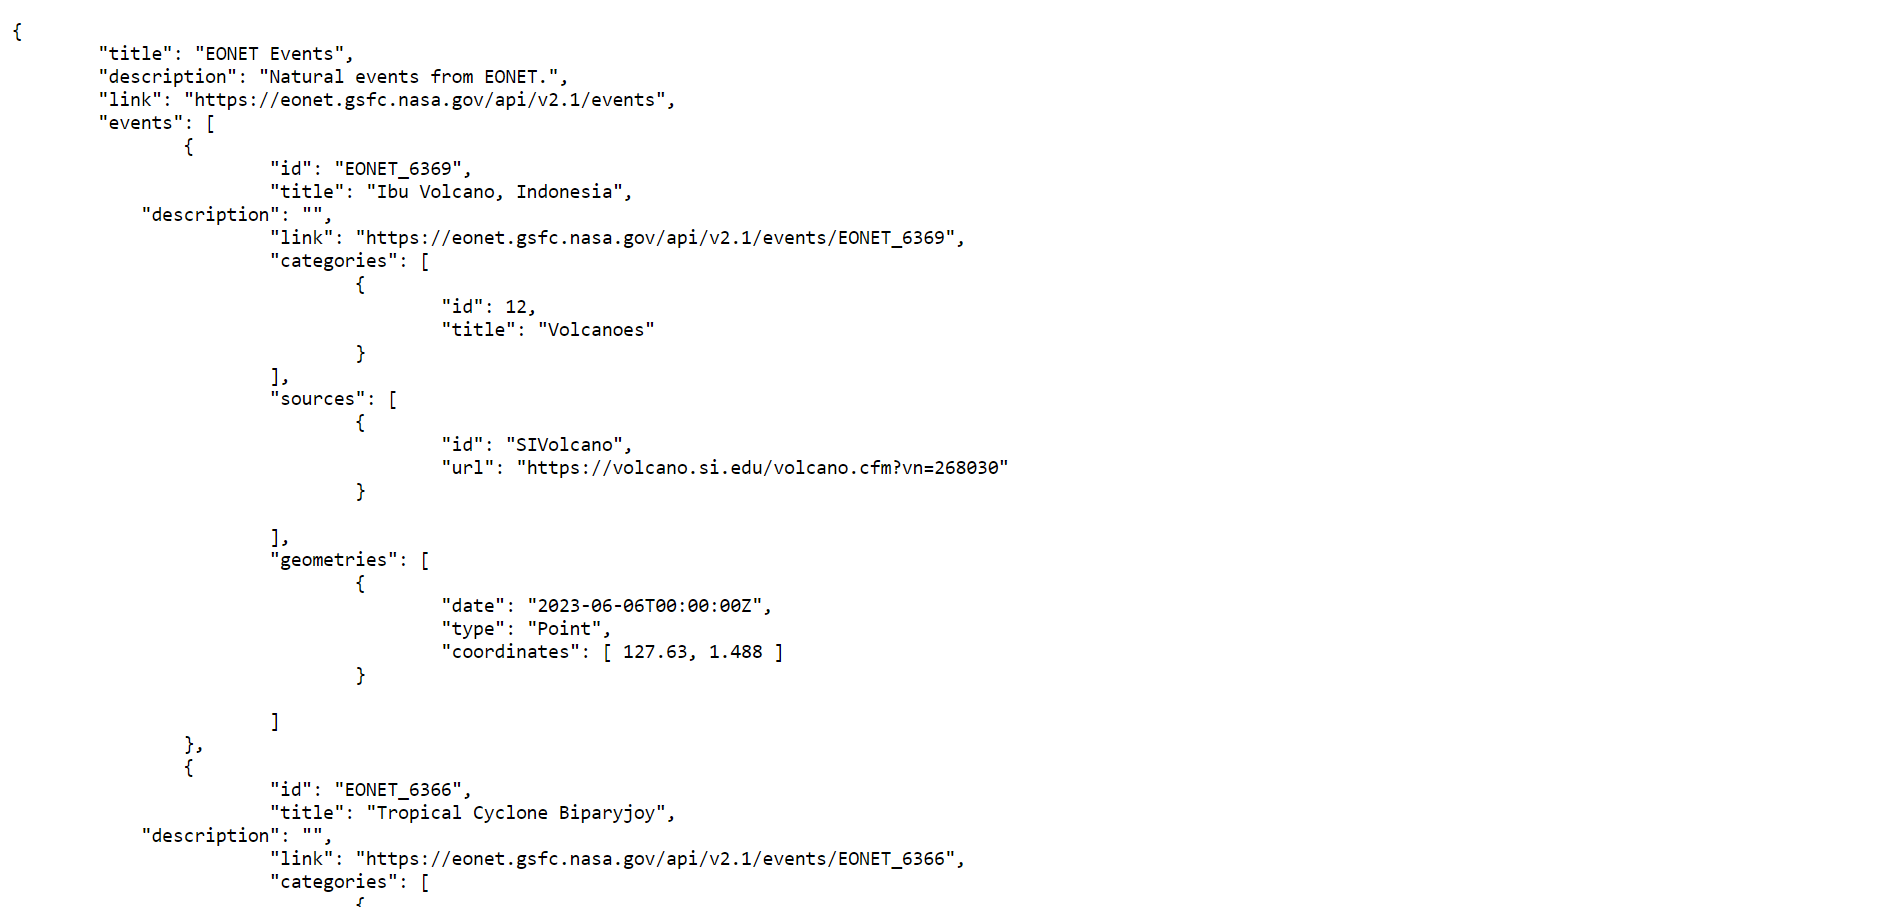

## <span style="color:blue; font-family:'Bodoni MT Black';">Eventos Parametros </span>
Cada evento tiene las siguientes propiedades:


|   NOMBRE    |                          DESCRIPCIÓN                           |
|-----------|--------------------------------------------------------------|
| identificación |           Identificación única para este evento.           |
|    título   |                   El título del evento.                      |
| descripción | Descripción opcional más larga del evento. Lo más probable es que sólo una frase o dos. |
|    enlace   |           El enlace completo al extremo de la API para este evento específico.          |
| categorías  |             Una o más categorías asignadas al evento.             |
|   fuentes   |       Una o más fuentes que remiten a más información sobre el evento.      |
| geometrías  | Una o más geometrías de eventos son el emparejamiento de una fecha/hora específica con una ubicación. Lo más probable es que la fecha/hora sea 00:00Z a menos que la fuente proporcione una hora en particular. La geometría será un objeto GeoJSON de tipo "Punto" o "Polígono". |
|   cerrado   | Un evento se considera “cerrado” cuando ha finalizado. El campo cerrado incluirá una fecha/hora en que finalizó el evento. Dependiendo de la naturaleza del evento, el valor cerrado puede o no representar con precisión el final absoluto del evento. |


### <span style="color:red; font-family:'Bodoni MT Black';">Categorias Parametros </span>
Cada categoria tiene las siguientes propiedades:

| Parámetro | Descripción                                                |
|-----------|------------------------------------------------------------|
| id        | ID único de la categoría.              |
| title     | El título de la categoría. |

### <span style="color:red; font-family:'Bodoni MT Black';">Geometrías Parametros </span>
Cada geometria tiene las siguientes propiedades:

| Parámetro      | Descripción                                                                                                        |
|----------------|--------------------------------------------------------------------------------------------------------------------|
| date           | La fecha y hora asociadas a la geometría del evento. |
| type           | El tipo de geometría.                                                         |
| coordinates    | Las coordenadas geográficas del punto en forma de una matriz|

### <span style="color:red; font-family:'Bodoni MT Black';">Fuentes Parametros </span>
Cada fuente tiene las siguientes propiedades:



| Parámetro | Descripción                                                                                               |
|-----------|-----------------------------------------------------------------------------------------------------------|
| id        | ID único de la fuente.                     |
| url       | La URL completa que proporciona más información sobre el evento.|

# <span style="color:blue; font-family:'Bodoni MT Black';">CODIGOS-API </span>
+ Acontinuación veremos como extraer información de la api 

In [2]:
# Librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl
import seaborn as sns
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import requests
import json
import csv
import folium

In [3]:

url="https://eonet.gsfc.nasa.gov/api/v2.1/events"
uclient=urlopen(url)
responsehtml=uclient.read()
uclient.close()
#print(responsehtml.decode())
#type(responsehtml.decode())

In [4]:
data = responsehtml.decode()
info = json.loads(data)
#print(info)

In [5]:
# Convertir los datos JSON en un DataFrame de pandas
df = pd.DataFrame(info['events'])

# Separar los datos en columnas 
df['TÍTULO_CATEGORÍA'] = df['categories'].apply(lambda x: x[0]['title'])
df['ID_CATEGORÍA'] = df['categories'].apply(lambda x: x[0]['id'])

df['ID_FUENTE'] = df['sources'].apply(lambda x: x[0]['id'])
df['URL_FUENTE'] = df['sources'].apply(lambda x: x[0]['url'])

df['FECHA_GEOMETRÍA'] = df['geometries'].apply(lambda x: x[0]['date'])
df['TIPO_GEOMETRÍA'] = df['geometries'].apply(lambda x: x[0]['type'])
df['COORDENADAS_GEOMETRÍA'] = df['geometries'].apply(lambda x: [coord['coordinates'] for coord in x])

# Expandir la lista de coordenadas en múltiples filas
df = df.explode('COORDENADAS_GEOMETRÍA')

# Separar las coordenadas en latitud y longitud
df['LATITUD'] = df['COORDENADAS_GEOMETRÍA'].apply(lambda x: x[1])
df['LONGITUD'] = df['COORDENADAS_GEOMETRÍA'].apply(lambda x: x[0])

# Eliminar las columnas 
df.drop(['sources', 'geometries', 'categories','COORDENADAS_GEOMETRÍA'], axis=1, inplace=True)

# Renombrar las columnas
df.rename(columns={
    'id': 'ID',
    'title': 'TÍTULO',
    'description': 'DESCRIPCIÓN',
    'link': 'ENLACE',
    'TÍTULO_CATEGORÍA': 'CATEGORÍA_TÍTULO',
    'ID_CATEGORÍA': 'CATEGORÍA_ID',
    'ID_FUENTE': 'FUENTE_ID',
    'URL_FUENTE': 'FUENTE_URL',
    'FECHA_GEOMETRÍA': 'GEOMETRÍA_FECHA',
    'TIPO_GEOMETRÍA': 'GEOMETRÍA_TIPO',
    'FECHA': 'FECHA',
    'LATITUD': 'LATITUD',
    'LONGITUD': 'LONGITUD'
}, inplace=True)

# Guardar el DataFrame en un archivo CSV
df.to_csv('datoseventos.csv', encoding='UTF-8', index=False, quoting=csv.QUOTE_ALL)


# <span style="color:red; font-family:'Bodoni MT Black';">CATEGORIAS</span>

In [6]:
import json

data = responsehtml.decode()
info = json.loads(data)
#print(info)

In [7]:
###Obtenerer el ID, NOMBRE Y CANTIDAD DE CATEGORIAS

cantidad_categorias = {}
ids_categorias = {}
for evento in info["events"]:
    for categoria in evento["categories"]:
        titulo_categoria = categoria["title"]
        id_categoria = categoria["id"]
        if titulo_categoria in cantidad_categorias:
            cantidad_categorias[titulo_categoria] += 1
        else:
            cantidad_categorias[titulo_categoria] = 1
        if id_categoria  in ids_categorias:
            ids_categorias[id_categoria] += 1
        else:
            ids_categorias[id_categoria] = 1

for categoria, cantidad in cantidad_categorias.items():
    print("Categoría:", categoria)
    print("Cantidad de eventos:", cantidad)
for IDs in ids_categorias.items():
    print("ID:", IDs)



Categoría: Volcanoes
Cantidad de eventos: 26
Categoría: Severe Storms
Cantidad de eventos: 2
Categoría: Wildfires
Cantidad de eventos: 335
Categoría: Sea and Lake Ice
Cantidad de eventos: 56
ID: (12, 26)
ID: (10, 2)
ID: (8, 335)
ID: (15, 56)


In [8]:
events = info['events']
Categoria = {}


for event in events:
    title = event['title']
    categories = event['categories']

    for category in categories:
        category_id = category['id']
        category_title = category['title']

        if category_id not in Categoria:
            Categoria[category_id] = pd.DataFrame(columns=['TITULO', 'Enlace',"Geometria"])

        # Agregar el evento al DataFrame de la categoría
        Categoria[category_id] = pd.concat([
            Categoria[category_id],
            pd.DataFrame({
                'TITULO': [title],

                'Enlace': [event['link']],
                'Geometria':[event['geometries']]
                
            })
        ], ignore_index=True)

#for category_id, df in dataframes.items():
    #print('Categoría:', category_id)
    #print(df)
    #print()
    

In [9]:
TORMENTAS=Categoria.get(10)
VOLCANES_ACTIVOS=Categoria.get(12)
ICEBERG=Categoria.get(15)
INCENDIOS_FORESTALES=Categoria.get(8)

In [11]:
#TORMETAS SEVERAS
TORMENTAS['FECHA_GEOMETRÍA'] = TORMENTAS['Geometria'].apply(lambda x: x[0]['date'])
TORMENTAS['TIPO_GEOMETRÍA'] = TORMENTAS['Geometria'].apply(lambda x: x[0]['type'])
TORMENTAS['COORDENADAS_GEOMETRÍA'] = TORMENTAS['Geometria'].apply(lambda x: [coord['coordinates'] for coord in x])

# Expandir la lista de coordenadas en múltiples filas
TORMENTAS = TORMENTAS.explode('COORDENADAS_GEOMETRÍA')

# Separar las coordenadas en latitud y longitud
TORMENTAS['LATITUD'] = TORMENTAS['COORDENADAS_GEOMETRÍA'].apply(lambda x: x[1])
TORMENTAS['LONGITUD'] = TORMENTAS['COORDENADAS_GEOMETRÍA'].apply(lambda x: x[0])
#print(TORMENTAS)



In [12]:
#VOLCANES ACTIVOS
VOLCANES_ACTIVOS['FECHA_GEOMETRÍA'] = VOLCANES_ACTIVOS['Geometria'].apply(lambda x: x[0]['date'])
VOLCANES_ACTIVOS['TIPO_GEOMETRÍA'] = VOLCANES_ACTIVOS['Geometria'].apply(lambda x: x[0]['type'])
VOLCANES_ACTIVOS['COORDENADAS_GEOMETRÍA'] = VOLCANES_ACTIVOS['Geometria'].apply(lambda x: [coord['coordinates'] for coord in x])

# Expandir la lista de coordenadas en múltiples filas
VOLCANES_ACTIVOS = VOLCANES_ACTIVOS.explode('COORDENADAS_GEOMETRÍA')

# Separar las coordenadas en latitud y longitud
VOLCANES_ACTIVOS['LATITUD'] = VOLCANES_ACTIVOS['COORDENADAS_GEOMETRÍA'].apply(lambda x: x[1])
VOLCANES_ACTIVOS['LONGITUD'] = VOLCANES_ACTIVOS['COORDENADAS_GEOMETRÍA'].apply(lambda x: x[0])

#print(VOLCANES_ACTIVOS)

In [13]:
#ICEBERG
ICEBERG['FECHA_GEOMETRÍA'] = ICEBERG['Geometria'].apply(lambda x: x[0]['date'])
ICEBERG['TIPO_GEOMETRÍA'] = ICEBERG['Geometria'].apply(lambda x: x[0]['type'])
ICEBERG['COORDENADAS_GEOMETRÍA'] = ICEBERG['Geometria'].apply(lambda x: [coord['coordinates'] for coord in x])

# Expandir la lista de coordenadas en múltiples filas
ICEBERG = ICEBERG.explode('COORDENADAS_GEOMETRÍA')

# Separar las coordenadas en latitud y longitud
ICEBERG['LATITUD'] = ICEBERG['COORDENADAS_GEOMETRÍA'].apply(lambda x: x[1])
ICEBERG['LONGITUD'] = ICEBERG['COORDENADAS_GEOMETRÍA'].apply(lambda x: x[0])

#print(ICEBERG)

In [14]:
#INCENDIOS FORESTALES
INCENDIOS_FORESTALES['FECHA_GEOMETRÍA'] = INCENDIOS_FORESTALES['Geometria'].apply(lambda x: x[0]['date'])
INCENDIOS_FORESTALES['TIPO_GEOMETRÍA'] = INCENDIOS_FORESTALES['Geometria'].apply(lambda x: x[0]['type'])
INCENDIOS_FORESTALES['COORDENADAS_GEOMETRÍA'] = INCENDIOS_FORESTALES['Geometria'].apply(lambda x: [coord['coordinates'] for coord in x])

# Expandir la lista de coordenadas en múltiples filas
INCENDIOS_FORESTALES = INCENDIOS_FORESTALES.explode('COORDENADAS_GEOMETRÍA')

# Separar las coordenadas en latitud y longitud
INCENDIOS_FORESTALES['LATITUD'] = INCENDIOS_FORESTALES['COORDENADAS_GEOMETRÍA'].apply(lambda x: x[1])
INCENDIOS_FORESTALES['LONGITUD'] = INCENDIOS_FORESTALES['COORDENADAS_GEOMETRÍA'].apply(lambda x: x[0])
#print(INCENDIOS_FORESTALES)

# <span style="color:blue; font-family:'Bodoni MT Black';">MAPAS</span>
Con la informcacion obtenida crearemos un archivo html que contenga mapas que muestren la ubicacion de los eventos por cada categoria.

In [15]:
#pip install folium
import folium
from folium.plugins import MarkerCluster, HeatMap

In [16]:
mapa = folium.Map()

# Crear el grupo de marcadores para la pestaña 1
grupo_marcadores_1 = folium.FeatureGroup(name='Tormentas severas')

# Agregar marcadores al mapa
for index, row in TORMENTAS.iterrows():
    grupo_marcadores_1.add_child(folium.Marker([row['LATITUD'], row['LONGITUD']], popup=row['TITULO'])).add_to(mapa)

# Crear el grupo de marcadores para la pestaña 2
grupo_marcadores_2 = folium.FeatureGroup(name='Volcanes Activos')

# Agregar marcadores al grupo de marcadores 2
for index, row in VOLCANES_ACTIVOS.iterrows():
    grupo_marcadores_2.add_child(folium.Marker([row['LATITUD'], row['LONGITUD']], popup=row['TITULO'])).add_to(mapa)

# Crear el grupo de marcadores para la pestaña 3
grupo_marcadores_3 = folium.FeatureGroup(name='Iceberg')

for index, row in ICEBERG.iterrows():
    grupo_marcadores_3.add_child(folium.Marker([row['LATITUD'], row['LONGITUD']], popup=row['TITULO'])).add_to(mapa)

# Crear el grupo de marcadores para la pestaña 4
grupo_marcadores_4 = folium.FeatureGroup(name='Incendios Forrestales')

for index, row in INCENDIOS_FORESTALES.iterrows():
    grupo_marcadores_4.add_child(folium.Marker([row['LATITUD'], row['LONGITUD']], popup=row['TITULO'])).add_to(mapa)

# Agregar los grupos de marcadores al mapa
mapa.add_child(grupo_marcadores_1)
mapa.add_child(grupo_marcadores_2)
mapa.add_child(grupo_marcadores_3)
mapa.add_child(grupo_marcadores_4)

# Crear el control de capas para las pestañas
control_capas = folium.LayerControl()

# Agregar el control de capas al mapa
mapa.add_child(control_capas)

# Mostrar el mapa
display(mapa)
mapa.save("Mapas_Eventos.html")